### iLaundry
A survey of laundry business and the general populace in other to plan for laundry app

In [1]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#make use of aethetics similar to R's ggplot 
plt.style.use('ggplot')

#### iLaundry Business

A survey of laundry businesses in different lacations was done in Abuja. In this survey, we seek to answer the following questions:
1. What are the challenges faced by laundry businesses?
2. Is Marketting necessary for laundry businesses?
3. What age group partronise laundry businesses?
4. Occupation of laundry customers?
5. Laundry owners opinion of a laundry app
6. Laundry services and their costs
7. Laundry services and their costs in different regions
The data collected is analysed below. 

In [3]:
df1 = pd.read_csv('ilaundrybusiness.csv')
# df1.head()

In [4]:
isize =df1.shape
print("The dataset contains {} rows and {} columns\n".format(isize[0],isize[1]))

# df1.info()

The dataset contains 15 rows and 17 columns



#### Description of the Original data
**The information** provided about the data shows columns *13* and *14* having **1** and **0** respectively. They will be dropped from the dataset. Similarly, Column *0* contains **Timestamp** which we do not need. This will be dropped too. The column names are impractical in length and there are spaces in between them. They will be changed to make indexing easier. Column *5* and *10* will be changed to **datetime** and **float** datatype respectively 

In [5]:
#rename the columns
df1.columns = ['Timestamp','businessname','inabj','location','addresss','businessage','ismobility','getcustomers','customersage',
              'customersjob','dailyincome','loyalcustomers','neutralcustomers','serviceslist','serviceslist2','apphelp','appdo']

#drop three columns (0,13,14)
df1=df1.drop(columns=['Timestamp','serviceslist','serviceslist2'])

#convert business age to datetime
df1['businessage']=df1['businessage'].astype('datetime64[ns]')

# df1.head()

In [6]:
# df1.info()

In [7]:
#change business age column to age of type int
from datetime import date
import re

def cal_age(dob):
    today = date.today()
    return today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))

df1['businessage']= df1['businessage'].apply(cal_age)

#convert dailyincome to numeric
df1['dailyincome'] = df1['dailyincome'].map(lambda x: re.sub(r'\W+', '', x))
df1['dailyincome']=df1['dailyincome'].astype('float')

In [8]:
df1.head()

,businessname,inabj,location,addresss,businessage,ismobility,getcustomers,customersage,customersjob,dailyincome,loyalcustomers,neutralcustomers,apphelp,appdo
0,A’chieve cleaning services,Yes,Wuye,Wuye ultra modern market,0,No,Yes,All range,All customers,5000.0,11-20%,31-40%,Yes,Enable customers book laundry service
1,Embassy Laundry,Yes,Wuse 2,Embassy Laundry Wuse 2,1,No,No,31-40;41-50;51-60;61-70,Civil Servant,0.0,91-100%,0%,I don't know,Enable customers book laundry service
2,Marcus Roland,Yes,Apo,"Plot 128, Ozomman street, back of NEPA Transmi...",13,Yes,Yes,31-40;41-50;51-60;61-70;71-80,Civil Servant;Working in the private sector;En...,0.0,91-100%,0%,It depends,Enable customers book laundry service;Offer Lo...
3,Laundry Man LTD,Yes,Garki,"12, Emelen Anyanye street Area 11 Garki",28,Yes,No,41-50,Civil Servant;Working in the private sector;En...,50000.0,71-80%,41-50%,No,Nil
4,Elite Wash,Yes,Wuse 2,Wuse 2 Abuja,4,Yes,Yes,21-30;31-40;41-50;51-60;61-70,Civil Servant;Working in the private sector,0.0,51-60%,41-50%,Yes,Enable customers book laundry service


In [9]:
#add a business agerange column
bins = [0,5,10,15,20,25,30,100]
labels = ['0-5','6-10','11-15','16-20','21-25','26-30','30+']
df1['businessagerange'] = pd.cut(df1['businessage'],bins,labels=labels,include_lowest=True)

In [10]:
# df1['businessagerange']

#### Describe Columns with Visuals

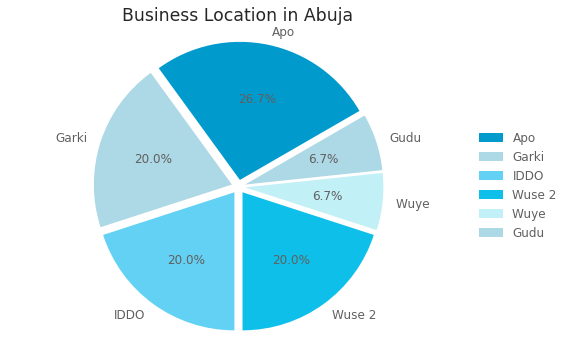

In [11]:
def plot_pie(ax,y_size,x_labels,color_palette,pie_title):
    explode = tuple([0.05 for i in range(len(y_size))])
    ax.pie(y_size, explode=explode, labels=x_labels,  
       colors=color_palette, autopct='%1.1f%%', 
       shadow=False, startangle=30)
    ax.axis('equal')
    ax.set_title(pie_title)
    ax.legend(frameon=False, bbox_to_anchor=(1,0,0.5,1), loc='center left')


color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
                     '#C1F0F6', '#ADD8E6','#B0E0E6','#5F9EA0']

#An error was notice in location column. This needs to be corrected
df1.iloc[10,2]='Garki'

freq1=df1['location'].value_counts()
title = "Business Location in Abuja"
with plt.style.context('seaborn-dark'):
    fig, ax = plt.subplots(figsize=(8,5))
    #set plt styles
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['text.color'] = '#606060'
    plt.rcParams['axes.labelcolor']= '#606060'
    plt.rcParams['xtick.color'] = '#606060'
    plt.rcParams['ytick.color'] = '#606060'
    plt.rcParams['font.size']=12
    plot_pie(ax,freq1.values,freq1.index.values,color_palette_list,title)

plt.tight_layout()
plt.show()

We observe that laundry business is quite evenly distributed in Abuja except in GUDU and Wuye. **The dataset is small so more data may be needed for reliable conclusions** 

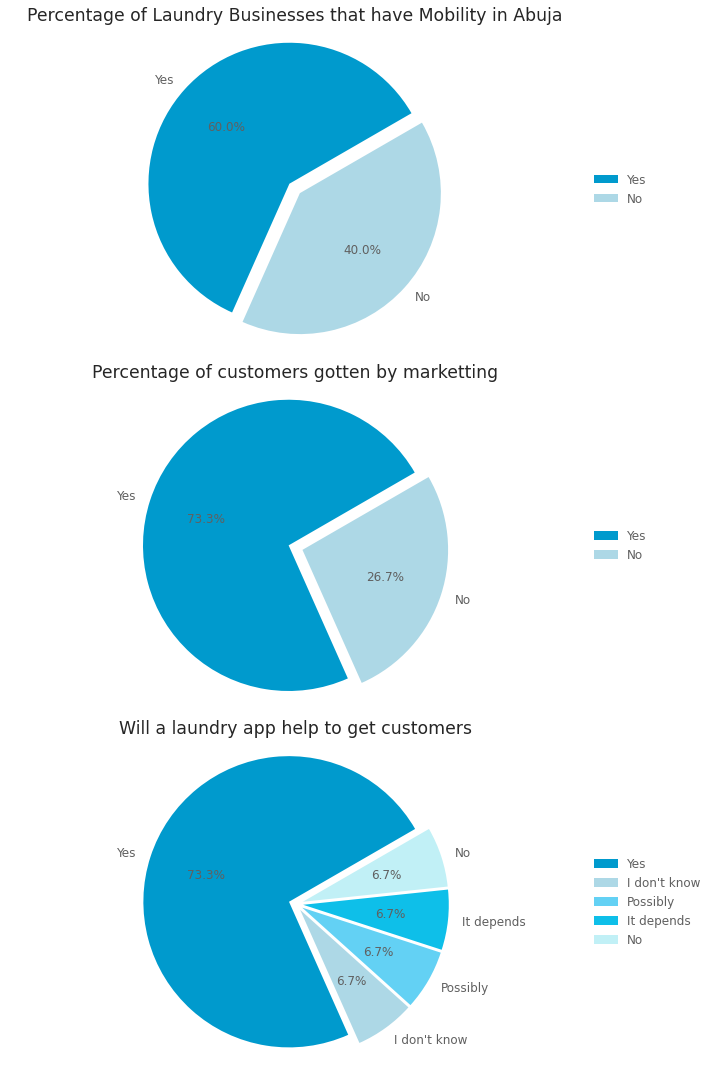

In [12]:
df2=df1[['ismobility','getcustomers','apphelp']]
title = ["Percentage of Laundry Businesses that have Mobility in Abuja", "Percentage of customers gotten by marketting",
         'Will a laundry app help to get customers']
with plt.style.context('seaborn-dark'):
    fig, ax = plt.subplots(3,1, figsize=(10,15))
    #set plt styles
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['text.color'] = '#606060'
    plt.rcParams['axes.labelcolor']= '#606060'
    plt.rcParams['xtick.color'] = '#606060'
    plt.rcParams['ytick.color'] = '#606060'
    plt.rcParams['font.size']=12
    for i in range(3):
        col = df2.iloc[:,i]
        freq=col.value_counts()
        plot_pie(ax[i],freq.values,freq.index.values,color_palette_list,title[i])

plt.tight_layout()
plt.show()

60% of the laundry businesses in Abuja that participated in the survay have mobility and may not need logistics services for a start. However, we might decide to offer logistics service for the remaining 40%.

We see that 73.3% of the participating businesses go out to find customers. THis shows that marketting is vital for a laundry business to succeed. Coicidentally, 73.3% of the laundry businesses agreed that a mobile app will help them get customers. An objective for this app can be to enable more people use laundry services.

In [13]:
#Handling customers, we need a method to seperate the options into individuals rows.
col_class = ['Civil Servant','Working in the private sector','Entrepreneurs',
                   'Student']
len_classes = len(col_class)
#get customers job column
df_col = df1['customersjob'].str.replace(';',',') 

#create an array to hold value and descriprion data
col_data = []
col_desc = []

for row in df_col:
   
    #split by the delimeter,
    row_items = row.split(',')
#     print(ch_arr)
    for item in row_items:
        
        if(item in col_class):
            item_index = col_class.index(item)
            col_data.append(item_index)
            col_desc.append(item)
        else:
            col_class.append(item)
            col_data.append(len_classes)
            col_desc.append(item)
            len_classes = len_classes + 1
                
# print("The list of classes: \n \n {} \n".format(col_class))

#convert it to a data frame for easy usage
col_df = pd.DataFrame({'code' : col_data,'desc' : col_desc})
# col_df.head()

code  desc                         
0     Civil Servant                    13
1     Working in the private sector    13
2     Entrepreneurs                    12
3     Student                           7
4     All customers                     1
5     Farmers                           1
dtype: int64


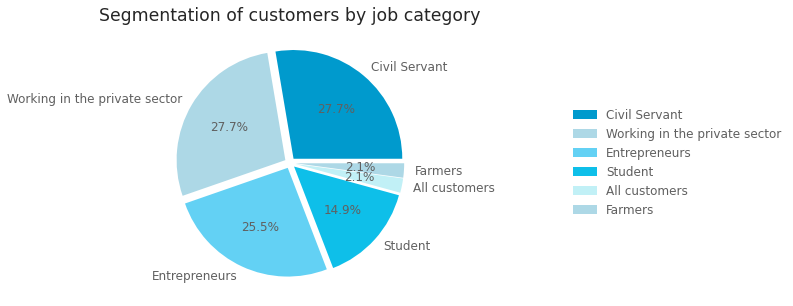

In [14]:
#Plotting pie chart of customers job
#count the number of each class
freq = col_df.groupby(['code','desc']).size()
# print(freq)

#labels for the chart
x_labels=freq.index.get_level_values('desc')
x_codes=freq.index.get_level_values('code')
y_size=freq.values
explode = tuple([0.05 for x in range(len(x_labels))])
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
                     '#C1F0F6', '#ADD8E6','#B0E0E6','#5F9EA0']

with plt.style.context('seaborn-dark'):
    fig, ax = plt.subplots(figsize=(8,5))

    #set plt styles
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['text.color'] = '#606060'
    plt.rcParams['axes.labelcolor']= '#606060'
    plt.rcParams['xtick.color'] = '#606060'
    plt.rcParams['ytick.color'] = '#606060'
    plt.rcParams['font.size']=12
    
    ax.pie(y_size, explode=explode, labels=x_labels,  
       colors=color_palette_list, autopct='%1.1f%%', 
       shadow=False, startangle=0)
#     ax.axis('equal')
    ax.set_title("Segmentation of customers by job category")
    ax.legend(frameon=False, bbox_to_anchor=(1.5,0,0.8,1), loc='center left')

plt.show()

We observe that most of the customers are working. The target customers for ilaundry should be individuals that have a source of livelihood especially(middle class and elite). A good way to reach this class of people is through channels on cable TV.

In [15]:
#Handling the column for app services,  
col_class = ['Enable customers book laundry service','Offer Logistics and delivery service',
             'Ensure Payment for services by customers']
len_classes = len(col_class)

#get customers job column
df_col = df1['appdo'].str.replace(';',',') 

#create an array to hold value and descriprion data
col_data = []
col_desc = []

for row in df_col:
   
    #split by the delimeter,
    row_items = row.split(',')
#     print(ch_arr)
    for item in row_items:
        
        if(item in col_class):
            item_index = col_class.index(item)
            col_data.append(item_index)
            col_desc.append(item)
        else:
            col_class.append(item)
            col_data.append(len_classes)
            col_desc.append(item)
            len_classes = len_classes + 1
                
# print("The list of classes: \n \n {} \n".format(col_class))

#convert it to a data frame for easy usage
col_df = pd.DataFrame({'code' : col_data,'desc' : col_desc})
# col_df.head()

The list of classes: 
 
 ['Enable customers book laundry service', 'Offer Logistics and delivery service', 'Ensure Payment for services by customers', 'Nil', "I don't know"] 



,code,desc
0,0,Enable customers book laundry service
1,0,Enable customers book laundry service
2,0,Enable customers book laundry service
3,1,Offer Logistics and delivery service
4,2,Ensure Payment for services by customers


code  desc                                    
0     Enable customers book laundry service       13
1     Offer Logistics and delivery service         5
2     Ensure Payment for services by customers     6
3     Nil                                          1
4     I don't know                                 1
dtype: int64


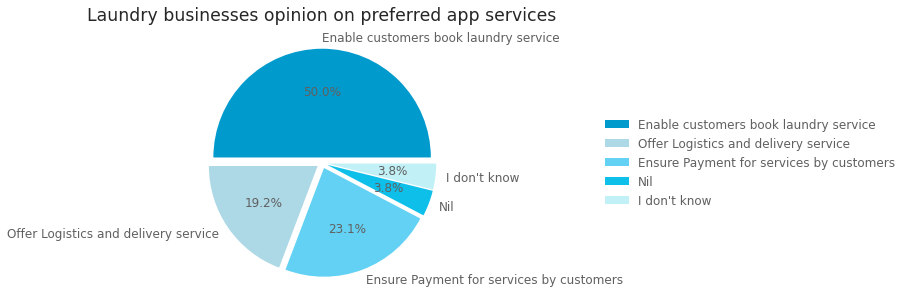

In [16]:
#Plotting pie chart of preferred app services

#count the number of each class
freq = col_df.groupby(['code','desc']).size()
# print(freq)

#labels for the chart
x_labels=freq.index.get_level_values('desc')
x_codes=freq.index.get_level_values('code')
y_size=freq.values
explode = tuple([0.05 for x in range(len(x_labels))])
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
                     '#C1F0F6', '#ADD8E6','#B0E0E6','#5F9EA0']

with plt.style.context('seaborn-dark'):
    fig, ax = plt.subplots(figsize=(8,5))

    #set plt styles
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['text.color'] = '#606060'
    plt.rcParams['axes.labelcolor']= '#606060'
    plt.rcParams['xtick.color'] = '#606060'
    plt.rcParams['ytick.color'] = '#606060'
    plt.rcParams['font.size']=12
    
    ax.pie(y_size, explode=explode, labels=x_labels,  
       colors=color_palette_list, autopct='%1.1f%%', 
       shadow=False, startangle=0)
#     ax.axis('equal')
    ax.set_title("Laundry businesses opinion on preferred app services")
    ax.legend(frameon=False, bbox_to_anchor=(1.5,0,0.8,1), loc='center left')

plt.show()

Again, we observe that enabling laundry booking services is of greater importance. Then ensuring payment for services by customers and lastly Logistics and delivery service.

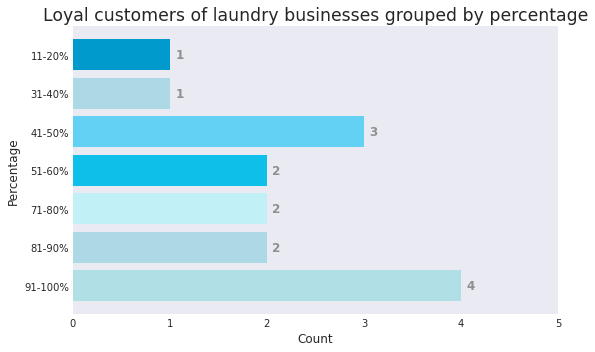

In [18]:
# df1[['loyalcustomers','neutralcustomer','businessagerange']]

freq1 =df1.groupby(['loyalcustomers']).size()
y1_labels = freq1.index.values
x1_data = freq1.values
y1 = np.arange(len(y1_labels))

with plt.style.context('seaborn-dark'):
    fig, ax = plt.subplots(figsize=(8,5))
    #set plt styles
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['text.color'] = '#606060'
    plt.rcParams['axes.labelcolor']= '#606060'
    plt.rcParams['xtick.color'] = '#606060'
    plt.rcParams['ytick.color'] = '#606060'
    plt.rcParams['font.size']=12
    
    bars1 = ax.barh(y1, x1_data,
            color=color_palette_list,       
            tick_label=y1_labels)

    for i, v in enumerate(x1_data):
        ax.text(v+0.1, y1[i], str(v), color='#909090', fontweight='bold',ha='center',va='center')
    
    ax.invert_yaxis()
    ax.set_title("Loyal customers of laundry businesses grouped by percentage")
    ax.set_ylabel("Percentage")
    ax.set_xlim((0,max(x1_data)+1))
    ax.set_xlabel("Count")

plt.tight_layout()
plt.show()

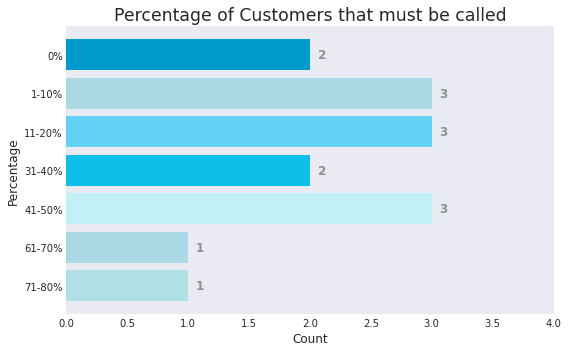

In [20]:
freq1 =df1.groupby(['neutralcustomers']).size()
y1_labels = freq1.index.values
x1_data = freq1.values
y1 = np.arange(len(y1_labels))

with plt.style.context('seaborn-dark'):
    fig, ax = plt.subplots(figsize=(8,5))
    #set plt styles
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['text.color'] = '#606060'
    plt.rcParams['axes.labelcolor']= '#606060'
    plt.rcParams['xtick.color'] = '#606060'
    plt.rcParams['ytick.color'] = '#606060'
    plt.rcParams['font.size']=12
    
    bars1 = ax.barh(y1, x1_data,
            color=color_palette_list,       
            tick_label=y1_labels)

    for i, v in enumerate(x1_data):
        ax.text(v+0.1, y1[i], str(v), color='#909090', fontweight='bold',ha='center',va='center')
    
    ax.invert_yaxis()
    ax.set_title("Percentage of Customers that must be called")
    ax.set_ylabel("Percentage")
    ax.set_xlim((0,max(x1_data)+1))
    ax.set_xlabel("Count")

plt.tight_layout()
plt.show()

We observe that customers prefer to stick to a laundry service once they gain their trust. Having a business rating service will help customers make this decision.

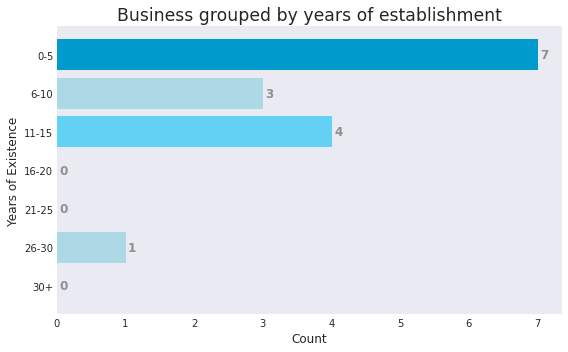

In [21]:
freq1 =df1.groupby(['businessagerange']).size()
y1_labels = freq1.index.values
x1_data = freq1.values
y1 = np.arange(len(y1_labels))

with plt.style.context('seaborn-dark'):
    fig, ax = plt.subplots(figsize=(8,5))
    #set plt styles
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['text.color'] = '#606060'
    plt.rcParams['axes.labelcolor']= '#606060'
    plt.rcParams['xtick.color'] = '#606060'
    plt.rcParams['ytick.color'] = '#606060'
    plt.rcParams['font.size']=12
    
    bars1 = ax.barh(y1, x1_data,
            color=color_palette_list,       
            tick_label=y1_labels)

    for i, v in enumerate(x1_data):
        ax.text(v+0.1, y1[i], str(v), color='#909090', fontweight='bold',ha='center',va='center')
    
    ax.invert_yaxis()
    ax.set_title("Business grouped by years of establishment")
    ax.set_ylabel("Years of Existence")
    ax.set_xlabel("Count")

plt.tight_layout()
plt.show()

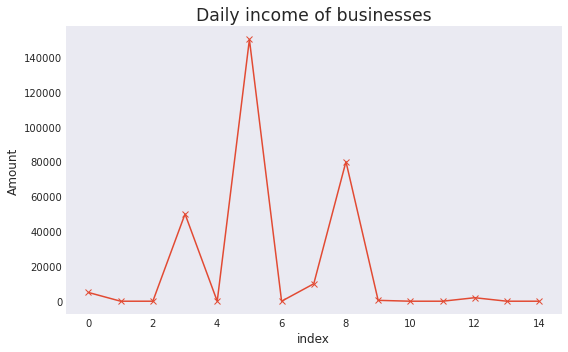

In [22]:
with plt.style.context('seaborn-dark'):
    fig, ax = plt.subplots(figsize=(8,5))
    #set plt styles
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['text.color'] = '#606060'
    plt.rcParams['axes.labelcolor']= '#606060'
    plt.rcParams['xtick.color'] = '#606060'
    plt.rcParams['ytick.color'] = '#606060'
    plt.rcParams['font.size']=12
    
    ax.plot(df1['dailyincome'],marker='x')
    
    ax.set_title("Daily income of businesses")
    ax.set_ylabel("Amount")
    ax.set_xlabel("index")

plt.tight_layout()
plt.show()

In [23]:
print("DAILY INCOME BASIC STATISTICS")
income_stats=df1['dailyincome'].describe()
income_stats

DAILY INCOME BASIC STATISTICS


count        15.000000
mean      19833.333333
std       42785.873281
min           0.000000
25%           0.000000
50%           0.000000
75%        7500.000000
max      150000.000000
Name: dailyincome, dtype: float64

In [24]:
print("\nDAILY INCOME  WITHOUT 0")
daily_income = df1.loc[df1['dailyincome']>0,'dailyincome']
daily_income


DAILY INCOME STATISTICS WITHOUT 0


0       5000.0
3      50000.0
5     150000.0
7      10000.0
8      80000.0
9        500.0
12      2000.0
Name: dailyincome, dtype: float64

In [28]:
print("\nDAILY INCOME STATISTICS WITHOUT 0")
income_stats=daily_income.describe()
income_stats


DAILY INCOME STATISTICS WITHOUT 0


count         7.000000
mean      42500.000000
std       56103.327293
min         500.000000
25%        3500.000000
50%       10000.000000
75%       65000.000000
max      150000.000000
Name: dailyincome, dtype: float64

In [30]:
# width =income_stats[3:].cumsum()
# width

We cannot be sure of the daily income of laundry businesses in Abuja as this data has errors, outlier and is very small.

Most laundry businesses would not divolve information about their daily income. A similar behavior is seen in providing information about their services and cost. More data needs to be collected for a conclusive work.